In [1]:
import xarray as xr
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [4]:
ds_sfIOP = xr.open_dataset('../../Data/SF_IOP_Pilot/v1_sf_data_iop_1085.nc')
ds_sfPilot = xr.open_dataset('../../Data/SF_IOP_Pilot/v1_sf_data_pilot_1072.nc')

In [5]:
sf2_new_all = ds_sfIOP.sf2_u.values
reg_arr = ds_sfIOP.delr.values

sf2_new_p_all = ds_sfPilot.sf2_u.values
reg_arr_p = ds_sfPilot.delr.values

In [6]:
sf2_new = np.mean(sf2_new_all,axis=(0,1))
sf2_new_p = np.mean(sf2_new_p_all,axis=(0,1))

sf2_new = sf2_new[~np.isnan(sf2_new)]
sf2_new_p = sf2_new_p[~np.isnan(sf2_new_p)]

In [7]:
def objective_function_Pilot_sf(x):
    # x represents the potential minimum location
    return np.log(sf2_new_p[int(x)])

bounds_Pilot = [(0, len(sf2_new_p)-1)]
result_Pilot = differential_evolution(objective_function_Pilot_sf, bounds_Pilot)

def objective_function_IOP_sf(x):
    # x represents the potential minimum location
    return np.log(sf2_new[int(x)])


bounds_IOP = [(0, len(sf2_new)-1)]

result_IOP = differential_evolution(objective_function_IOP_sf, bounds_IOP)

In [8]:
# Get the minimum value and its location

min_value_IOP = result_IOP.fun
min_location_index_IOP = int(result_IOP.x)+1

min_value_pilot = result_Pilot.fun
min_location_index_pilot = int(result_Pilot.x)+1

In [9]:
reg_arr_p[min_location_index_pilot]

188

In [11]:
np.exp(min_value_pilot)

0.0009508254878945435

In [11]:
depths = np.arange(3.9,51.9,2)+1.9

In [12]:
len_delr = 4968
data_array = xr.DataArray(np.mean(sf2_new_p_all,axis=(0))[:,:len_delr], coords={'depths': depths, 'reg_arr_p': reg_arr_p[:len_delr]}, dims=['depths', 'reg_arr_p'])

In [13]:
delr_coarsen = xr.DataArray(reg_arr_p).coarsen(dim_0=20,boundary='trim').mean()
sf2_p_coarsen = xr.DataArray(np.mean(sf2_new_p_all,axis=(0))).coarsen(dim_1=20,boundary='trim').mean()

In [14]:
#Pilot all depth minima 

all_depth_pilot_sf  = sf2_p_coarsen     #.    np.mean(sf2_new_p_all,axis=(0))
delr_index = []
sf_d = []

for i in range(len(all_depth_pilot_sf[:,0])):
    ds_idepth = all_depth_pilot_sf[i,:]
    ds_idepth = ds_idepth[~np.isnan(ds_idepth)]
    def objective_function_Pilot_sf(x):
        # x represents the potential minimum location
        return ds_idepth[int(x)]

    bounds_Pilot = [(0, len(ds_idepth)-1)]
    result_Pilot = differential_evolution(objective_function_Pilot_sf, bounds_Pilot)

    min_value_pilot = result_Pilot.fun
    min_location_index_pilot = int(result_Pilot.x)+1
    
    delr_index = np.append(delr_index,min_location_index_pilot)
    sf_d = np.append(sf_d,min_value_pilot)
    
    
    


In [15]:
reg_arr_p[int(delr_index[0])]

13

In [16]:
delrs = [delr_coarsen[int(delr_index[i])] for i in range(len(delr_index))]

In [19]:
reg_arr_p[~np.isnan(reg_arr_p)]

array([    1,     2,     3, ..., 21053, 21054, 21055])

In [20]:
len_delr = 5968
data_array_iop = xr.DataArray(np.mean(sf2_new_all,axis=(0))[:,:len_delr], coords={'depths': depths, 'reg_arr': reg_arr[:len_delr]}, dims=['depths', 'reg_arr'])

In [21]:
delr_coarsen_iop = xr.DataArray(reg_arr).coarsen(dim_0=20,boundary='trim').mean()
sf2_p_coarsen_iop = xr.DataArray(np.mean(sf2_new_all,axis=(0))).coarsen(dim_1=20,boundary='trim').mean()

In [22]:
#IOP-1 all depth minima 

all_depth_iop_sf  = sf2_p_coarsen_iop   #np.mean(sf2_new_all,axis=(0))
delr_index_iop = []
sf_d_iop = []

for i in range(len(all_depth_iop_sf[:,0])):
    #print(i)
    ds_idepth_iop = all_depth_iop_sf[i,:]
    ds_idepth_iop = ds_idepth_iop[~np.isnan(ds_idepth_iop)]
    def objective_function_iop_sf(x):
        # x represents the potential minimum location
        return ds_idepth_iop[int(x)]

    bounds_iop = [(0, len(ds_idepth_iop)-1)]
    result_iop = differential_evolution(objective_function_iop_sf, bounds_iop,tol=0.005)

    min_value_iop = result_iop.fun
    min_location_index_iop = int(result_iop.x)+1
    
    delr_index_iop = np.append(delr_index_iop,min_location_index_iop)
    sf_d_iop = np.append(sf_d_iop,min_value_iop)
    
    
    


In [23]:
delrs_iop = [delr_coarsen_iop[int(delr_index_iop[i])] for i in range(len(delr_index_iop))]

In [25]:
np.mean(delrs_iop), np.std(delrs_iop)

(217.16666666666666, 29.249881291307073)

In [26]:
np.mean(delrs), np.std(delrs)

(178.83333333333334, 41.19735698102759)

In [27]:
np.mean(delrs_iop[:6])

230.5

In [28]:
np.mean(delrs[:6])

240.5

Text(0.02, 1.07, '[b]')

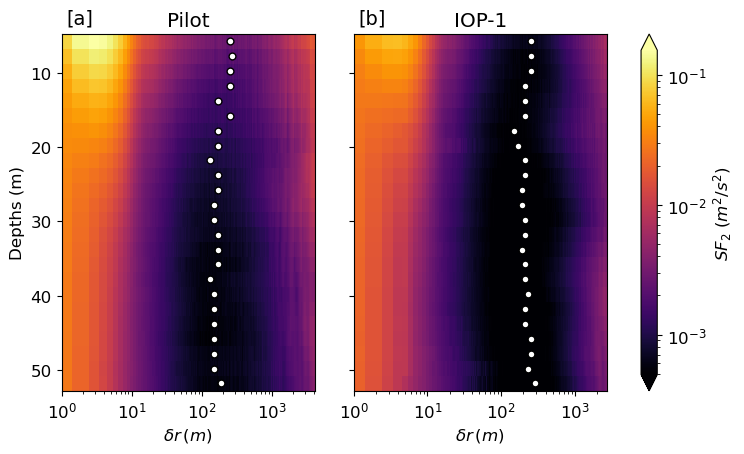

In [29]:
import matplotlib.pyplot as plt
from matplotlib import colors

# Set the overall font size for the plot
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

# Define the LogNorm object for the color scale with suitable vmin and vmax values
norm = colors.LogNorm(vmin=data_array.min(), vmax=data_array.max())

# Pilot Data Plot
p1 = data_array.plot(ax=axs[0], add_colorbar=False, xscale="log", norm=norm, cmap='inferno')
axs[0].scatter(delrs, data_array.depths.values,  color='white', edgecolor='black', s=24, zorder=3)  # Increase scatter size for visibility
axs[0].invert_yaxis()
axs[0].set_xlim([1, 4100])  # Adjust for log scale (0 is not allowed)
axs[0].set_xlabel(r'$\delta r\, (m)$')
axs[0].set_ylabel('Depths (m)')
axs[0].set_title('Pilot')

# IOP Data Plot
p2 = data_array_iop.isel(reg_arr=slice(0, 2754)).plot(ax=axs[1], add_colorbar=False, xscale="log", norm=norm, cmap='inferno')
axs[1].scatter(delrs_iop, data_array_iop.depths.values, color='white', edgecolor='black', s=24, zorder=3)  # Increase scatter size for visibility
axs[1].invert_yaxis()
axs[1].set_xlim([1, 2708])  # Adjust for log scale (0 is not allowed)
axs[1].set_xlabel(r'$\delta r\, (m)$')
axs[1].set_title('IOP-1')
axs[1].set_ylabel('')

# Adjust layout
plt.tight_layout(pad=2.0)  # Add some padding to ensure nothing is clipped

# Create a colorbar
cbar = fig.colorbar(p2, ax=axs.ravel().tolist(), extend='both')
cbar.set_label(r'$SF_{2}$ ($m^{2}/s^{2}$)')

# Add subplot labels
axs[0].text(0.02, 1.07, '[a]', transform=axs[0].transAxes, fontsize=14, va='top')
axs[1].text(0.02, 1.07, '[b]', transform=axs[1].transAxes, fontsize=14, va='top')


#plt.savefig('../Plots/SF_vs_depth_for_minimum_avg_window_test_1hzdata.png',bbox_inches='tight',dpi=150)